## Equação 1

$$\frac{\varepsilon(\rho_0)}{\rho_0} - M + B_0 = 0$$

## Equação 2

$$A(\rho) = \frac{a}{(1+b \rho)^n}$$

## Equação 3

$$B(\rho) = \frac{1}{\rho} - \frac{1}{\rho} \cdot \exp\left[ -\frac{\left( 4 - \frac{3 b \rho}{4}\right)\frac{3 b \rho}{4}}{\left( 1 - \frac{3 b \rho}{4}\right)^2}\right]$$

**O sistema é:**

$$\left\{\begin{aligned}
\varepsilon(\rho_0) / \rho_0 - M + B_0 &= 0 \\
P(\rho_0) &= 0 \\
K(\rho_0) - K_0 &= 0
\end{aligned}\right.$$

As variáveis são

$$\vec{x} = 
\begin{bmatrix}
a \\
b \\
n \\
\end{bmatrix}$$

Os parâmetros são $\rho_0$, $K_0$, $B_0$ e $M$

In [3]:
using Symbolics

@variables ρ a b n γ

ħ_c = 197.33 # MeV.fm
M = 938 #MeV
ρ₀= 0.16#(ħ_c)^3 #MeV^3  ##fm^-3
B₀ = 16 #MeV
K₀ = 250 #MeV
γ₀ = 4 #Adimensional

4

In [4]:
A = a / (1 + b * ρ)^n;

In [5]:
B = (1/ρ) - (1/ρ) * exp((((-1*b*ρ/4)*(4-((3*b*ρ)/4)))/(1-((b*ρ)/4))^2));

In [6]:
ρ_star = ρ /(1-B*ρ);

In [7]:
kf_star = ((6*π^2*ρ_star)/γ)^(1//3);

In [32]:
#ε_star=(γ /(16*π^2))*( (2*kf_star^3 + kf_star*M^2)*hypot(kf_star, M) - M^4 * asinh(kf_star/M))
ε_star = (γ /(16*π^2))*((hypot(kf_star, M)*kf_star*(2*kf_star^2+M^2)) + M^4*log(M/(hypot(kf_star, M)+kf_star)))
#kf_star*hypot(kf_star, M) - (M^2)*atanh( kf_star/hypot(kf_star, M)));

In [33]:
ε = (1 - B*ρ) * ε_star - A * ρ^2;

In [10]:
P_star = (γ/(48*π^2))*( (2*kf_star^3 - 3*kf_star*M^2)*hypot(kf_star, M) + 3*M^4*asinh(kf_star/M))


In [11]:
Dρ = Differential(ρ)
Σ = Dρ(B) * ρ * P_star - Dρ(A) * ρ^2;

In [12]:
P = P_star - (A * ρ^2) + (ρ * Σ); #ρ^2 * Dρ(ε/ρ) TODO: why is the symbolic differentiation not working?

In [13]:
K_id_star = 3 * kf_star^2 / hypot(kf_star, M);

In [14]:
K = 9 * Dρ(P);

In [34]:
# Outputs of F(X)

y1 = ε/ρ - M  ; ##+ B₀;
y2 = P;
y3 = K - K₀;
y4 = A;
y5 = B;
y6 = ε_star;

In [35]:
F_symb = [y1, y2, y3,y4,y5,y6];

In [36]:
#TODO
F_symb = expand_derivatives.(F_symb)
f_expr = build_function(F_symb, [a, b, n, ρ, γ])
F = eval(f_expr[1])

#5 (generic function with 1 method)

In [37]:
F([447.804015, 1.26421399, 3.009682, ρ₀, γ₀])

6-element Vector{Float64}:
  -41.15435986424757
   -3.2504490112848874
 -367.09343049377765
  257.218833656541
    1.2135731465212176
  186.24327937432452

In [38]:

F([447.804015, 1.26421399, 3.009682, ρ₀, γ₀])[1]

-41.15435986424757

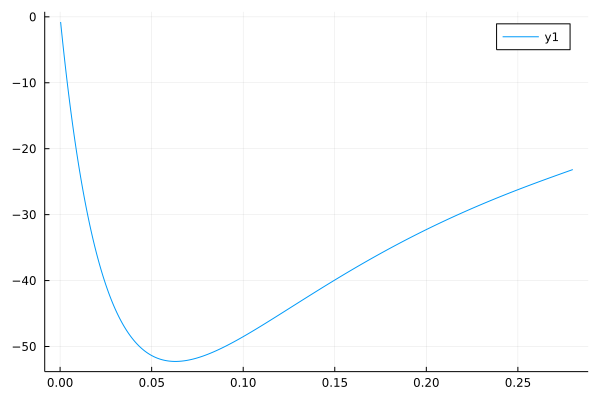

In [43]:

using Plots
f(x) = F([447.804015, 1.26421399, 3.009682, x/ρ₀ , 4])[1]
g(x) =F([447.804015, 1.26421399, 3.009682, x/ρ₀, 4])[2]
 = LinRange(0.0,0.28,1000)
ys = f.(xs)
ys1 = g.(xs)
plot(xs,ys)


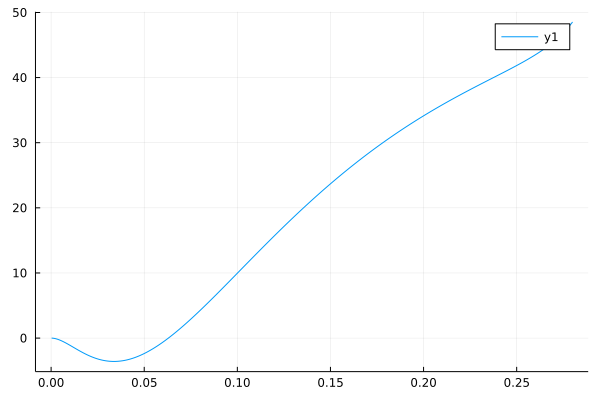

In [44]:
plot((xs,ys1))